<h2> R Vignette and Titanic </h2>

Importing the required package - dplyr

In [1]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



src is a collection of types of database tables. We can use src_sqlite(), src_mysql(), src_postgres() and src_bigquery() to connect to the specific types supported by dplyr.

In [2]:
flightdatabase <- src_sqlite("database.sqlite3", create = T)

flightdatabase is empty right now. We will import flights database available in R and copy to our flighdatabase table.

In [3]:
library(nycflights13)

In [4]:
flights_sqlite <- copy_to(flightdatabase, flights, temporary = FALSE, indexes = list(
  c("year", "month", "day"), "carrier", "tailnum"))

For this particular dataset, there’s a built-in src that will cache flights in a standard location.

In [5]:
flights_sqlite <- tbl(nycflights13_sqlite(), "flights")

Caching nycflights db at C:\Users\Ashwini\AppData\Local\Temp\Rtmp8yXDPh/nycflights13.sqlite
Creating table: airlines
Creating table: airports
Creating table: flights
Creating table: planes
Creating table: weather


In [6]:
flights_sqlite

Source:   query [?? x 19]
Database: sqlite 3.11.1 [C:\Users\Ashwini\AppData\Local\Temp\Rtmp8yXDPh/nycflights13.sqlite]

    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      517            515         2      830            819
2   2013     1     1      533            529         4      850            830
3   2013     1     1      542            540         2      923            850
4   2013     1     1      544            545        -1     1004           1022
5   2013     1     1      554            600        -6      812            837
6   2013     1     1      554            558        -4      740            728
7   2013     1     1      555            600        -5      913            854
8   2013     1     1      557            600        -3      709            723
9   2013     1     1      557            600        -3      838            846
10  2013   

Or we can aslo use SQL query to get data from flights table. 

In [7]:
tbl(flightdatabase, sql("SELECT * FROM flights"))

Source:   query [?? x 19]
Database: sqlite 3.11.1 [database.sqlite3]

    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      517            515         2      830            819
2   2013     1     1      533            529         4      850            830
3   2013     1     1      542            540         2      923            850
4   2013     1     1      544            545        -1     1004           1022
5   2013     1     1      554            600        -6      812            837
6   2013     1     1      554            558        -4      740            728
7   2013     1     1      555            600        -5      913            854
8   2013     1     1      557            600        -3      709            723
9   2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      7

Whenever we are dealing with data  sources, we have five basic verbs : 
<ul>
<li>select</li>
<li>filter</li>
<li>arrange</li>
<li>mutate</li>
<li>summarize</li>
</ul>

select : We can select the specific columns from the table.

In [8]:
select(flights_sqlite, year:day, dep_delay, arr_delay)

Source:   query [?? x 5]
Database: sqlite 3.11.1 [C:\Users\Ashwini\AppData\Local\Temp\Rtmp8yXDPh/nycflights13.sqlite]

    year month   day dep_delay arr_delay
   <int> <int> <int>     <dbl>     <dbl>
1   2013     1     1         2        11
2   2013     1     1         4        20
3   2013     1     1         2        33
4   2013     1     1        -1       -18
5   2013     1     1        -6       -25
6   2013     1     1        -4        12
7   2013     1     1        -5        19
8   2013     1     1        -3       -14
9   2013     1     1        -3        -8
10  2013     1     1        -2         8
# ... with more rows

filter : We can filter the data based on the specific query using filter command with parameters like table_name and query.

In [9]:
filter(flights_sqlite, dep_delay > 240)

Source:   query [?? x 19]
Database: sqlite 3.11.1 [C:\Users\Ashwini\AppData\Local\Temp\Rtmp8yXDPh/nycflights13.sqlite]

    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      848           1835       853     1001           1950
2   2013     1     1     1815           1325       290     2120           1542
3   2013     1     1     1842           1422       260     1958           1535
4   2013     1     1     2115           1700       255     2330           1920
5   2013     1     1     2205           1720       285       46           2040
6   2013     1     1     2343           1724       379      314           1938
7   2013     1     2     1332            904       268     1616           1128
8   2013     1     2     1412            838       334     1710           1147
9   2013     1     2     1607           1030       337     2003           1355
10  2013   

arrange : We can also sort the data using arrange command. It sorts the data in ascending order of the variables passed to the function.

In [10]:
arrange(flights_sqlite, year, month, day)

Source:   query [?? x 19]
Database: sqlite 3.11.1 [C:\Users\Ashwini\AppData\Local\Temp\Rtmp8yXDPh/nycflights13.sqlite]

    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      517            515         2      830            819
2   2013     1     1      533            529         4      850            830
3   2013     1     1      542            540         2      923            850
4   2013     1     1      544            545        -1     1004           1022
5   2013     1     1      554            600        -6      812            837
6   2013     1     1      554            558        -4      740            728
7   2013     1     1      555            600        -5      913            854
8   2013     1     1      557            600        -3      709            723
9   2013     1     1      557            600        -3      838            846
10  2013   

mutate : We can create new variables based on existing variables using mutate command. Like in the following command we are creating a new variable -> speed based on existing ones.

In [11]:
mutate(flights_sqlite, speed = air_time / distance)

Source:   query [?? x 20]
Database: sqlite 3.11.1 [C:\Users\Ashwini\AppData\Local\Temp\Rtmp8yXDPh/nycflights13.sqlite]

    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      517            515         2      830            819
2   2013     1     1      533            529         4      850            830
3   2013     1     1      542            540         2      923            850
4   2013     1     1      544            545        -1     1004           1022
5   2013     1     1      554            600        -6      812            837
6   2013     1     1      554            558        -4      740            728
7   2013     1     1      555            600        -5      913            854
8   2013     1     1      557            600        -3      709            723
9   2013     1     1      557            600        -3      838            846
10  2013   

summarise : We can perform various operations on particular column using summarise command. In the following command we have found the mean of departure time column.

In [12]:
summarise(flights_sqlite, delay = mean(dep_time))

Source:   query [?? x 1]
Database: sqlite 3.11.1 [C:\Users\Ashwini\AppData\Local\Temp\Rtmp8yXDPh/nycflights13.sqlite]

    delay
    <dbl>
1 1349.11

When we execute series of commands, dplyr do not touch the table unless we ask for th specific variable.<br>
In the following series of command, nothing has been executed unless we ask for a particular variable in next command.

In [13]:
c1 <- filter(flights_sqlite, year == 2013, month == 1, day == 1)
c2 <- select(c1, year, month, day, carrier, dep_delay, air_time, distance)
c3 <- mutate(c2, speed = distance / air_time * 60)
c4 <- arrange(c3, year, month, day, carrier)

In [14]:
c4

Source:   query [?? x 8]
Database: sqlite 3.11.1 [C:\Users\Ashwini\AppData\Local\Temp\Rtmp8yXDPh/nycflights13.sqlite]

    year month   day carrier dep_delay air_time distance    speed
   <int> <int> <int>   <chr>     <dbl>    <dbl>    <dbl>    <dbl>
1   2013     1     1      9E         0      189     1029 326.6667
2   2013     1     1      9E        -9       57      228 240.0000
3   2013     1     1      9E        -3       68      301 265.5882
4   2013     1     1      9E        -6       57      209 220.0000
5   2013     1     1      9E        -8       66      264 240.0000
6   2013     1     1      9E         0       40      184 276.0000
7   2013     1     1      9E         6      146      740 304.1096
8   2013     1     1      9E         0      139      665 287.0504
9   2013     1     1      9E        -8      150      765 306.0000
10  2013     1     1      9E        -6       41      187 273.6585
# ... with more rows

To see all the results of c4, we cab use collect command.

In [15]:
collect(c4)

year,month,day,carrier,dep_delay,air_time,distance,speed
2013,1,1,9E,0,189,1029,326.6667
2013,1,1,9E,-9,57,228,240.0000
2013,1,1,9E,-3,68,301,265.5882
2013,1,1,9E,-6,57,209,220.0000
2013,1,1,9E,-8,66,264,240.0000
2013,1,1,9E,0,40,184,276.0000
2013,1,1,9E,6,146,740,304.1096
2013,1,1,9E,0,139,665,287.0504
2013,1,1,9E,-8,150,765,306.0000
2013,1,1,9E,-6,41,187,273.6585


We can see the query dplyr has generated by looking at the query component of the object.

In [16]:
c4$query

NULL

explain command tells us how the query is being executed.

In [17]:
explain(c4)

<SQL>
SELECT *
FROM (SELECT `year`, `month`, `day`, `carrier`, `dep_delay`, `air_time`, `distance`, `distance` / `air_time` * 60.0 AS `speed`
FROM (SELECT `year` AS `year`, `month` AS `month`, `day` AS `day`, `carrier` AS `carrier`, `dep_delay` AS `dep_delay`, `air_time` AS `air_time`, `distance` AS `distance`
FROM (SELECT *
FROM `flights`
WHERE ((`year` = 2013.0) AND (`month` = 1.0) AND (`day` = 1.0)))))
ORDER BY `year`, `month`, `day`, `carrier`


<PLAN>
   addr       opcode p1    p2 p3           p4 p5 comment
1     0         Init  0    56  0              00      NA
2     1   SorterOpen  4     9  0       k(1,B) 00      NA
3     2     OpenRead  3   131  0           19 00      NA
4     3     OpenRead  5 22656  0     k(4,,,,) 02      NA
5     4         Real  0     1  0         2013 00      NA
6     5         Real  0     2  0            1 00      NA
7     6         Real  0     3  0            1 00      NA
8     7     Affinity  1     3  0          DDD 00      NA
9     8       SeekGE  5   

In SQLite variable names are escaped by double quotes.

In [18]:
translate_sql(x)

<SQL> "x"

And strings are escaped by single quotes

In [19]:
translate_sql("x")

<SQL> 'x'

Many functions have slightly different names.<br>

In [20]:
translate_sql(x == 1 && (y < 2 || z > 3))

<SQL> "x" = 1.0 AND ("y" < 2.0 OR "z" > 3.0)

In [21]:
translate_sql(x ^ 2 < 10)

<SQL> POWER("x", 2.0) < 10.0

In [22]:
translate_sql(x %% 2 == 10)

<SQL> "x" % 2.0 = 10.0

R and SQL have different defaults for integers and reals.
In R, 1 is a real, and 1L is an integer
In SQL, 1 is an integer, and 1.0 is a real

In [23]:
translate_sql(1)

<SQL> 1.0

In [24]:
translate_sql(1L)

<SQL> 1

In [25]:
translate_sql(glob(x, y))

<SQL> GLOB("x", "y")

In [26]:
translate_sql(x %like% "ab*")

<SQL> "x" LIKE 'ab*'

group_by help us to make groups of data based on the column we want.

In [27]:
by_tailnum <- group_by(flights_sqlite, tailnum)

summarize functions help us to make computations on columns such as count.mean,sum.

In [28]:
delay <- summarise(by_tailnum,
  count = n(),
  dist = mean(distance),
  delay = mean(arr_delay)
)

To get the data which we want, we can filter out the data based on the condition.

In [29]:
delay <- filter(delay, count > 20, dist < 2000)
delay_local <- collect(delay)

In [30]:
delay_local

tailnum,count,dist,delay
NA,2512,710.2576,NA
N0EGMQ,371,676.1887,9.9829545
N10156,153,757.9477,12.7172414
N102UW,48,535.8750,2.9375000
N103US,46,535.1957,-6.9347826
N104UW,47,535.2553,1.8043478
N10575,289,519.7024,20.6914498
N105UW,45,524.8444,-0.2666667
N107US,41,528.7073,-5.7317073
N108UW,60,534.5000,-1.2500000


<h2><b> Titanic </h2>

Read the required files.

In [2]:
train <- read.csv("titanic-selected/train.csv", header=TRUE)
test <- read.csv("titanic-selected/test.csv", header=TRUE)

In [3]:
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


Factoring plcass and survived variables.<br>
Survived :
0 = No
1 = Yes

In [4]:
train <- within(train, Survived <- factor(Survived, labels = c("No", "Yes")))
train <- within(train, Pclass <- factor(Pclass))
test <- within(test, Pclass <- factor(Pclass))

In [5]:
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,Yes,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,No,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,No,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


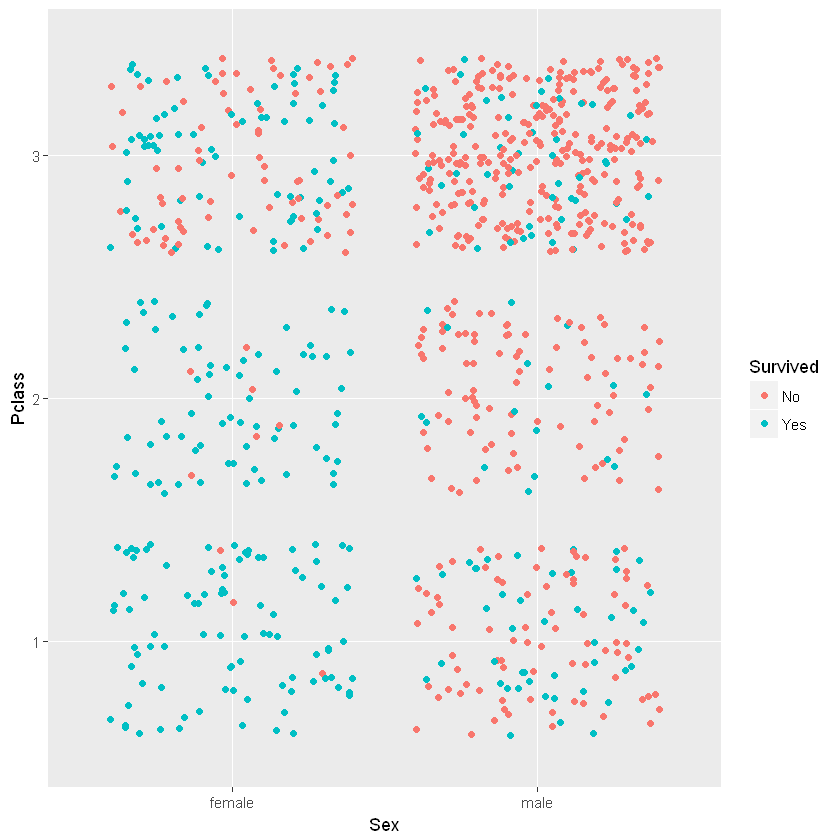

In [6]:
library(ggplot2)
qplot(Sex, Pclass, colour = Survived, data=train, geom="jitter")

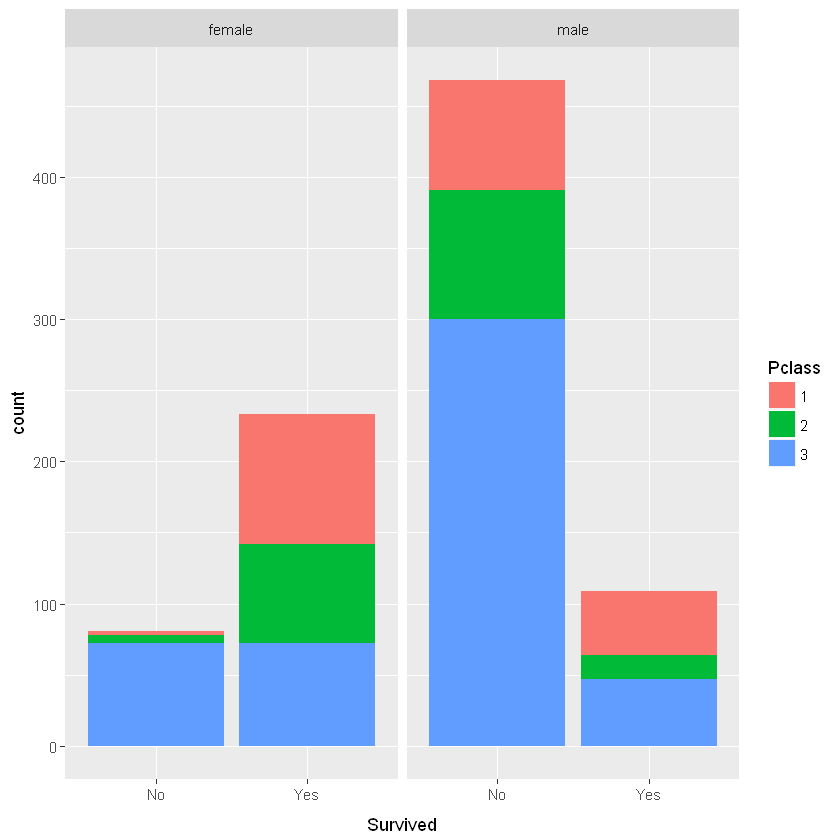

In [7]:
qplot(Survived, data=train, geom="bar", facets = . ~ Sex, fill=Pclass)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


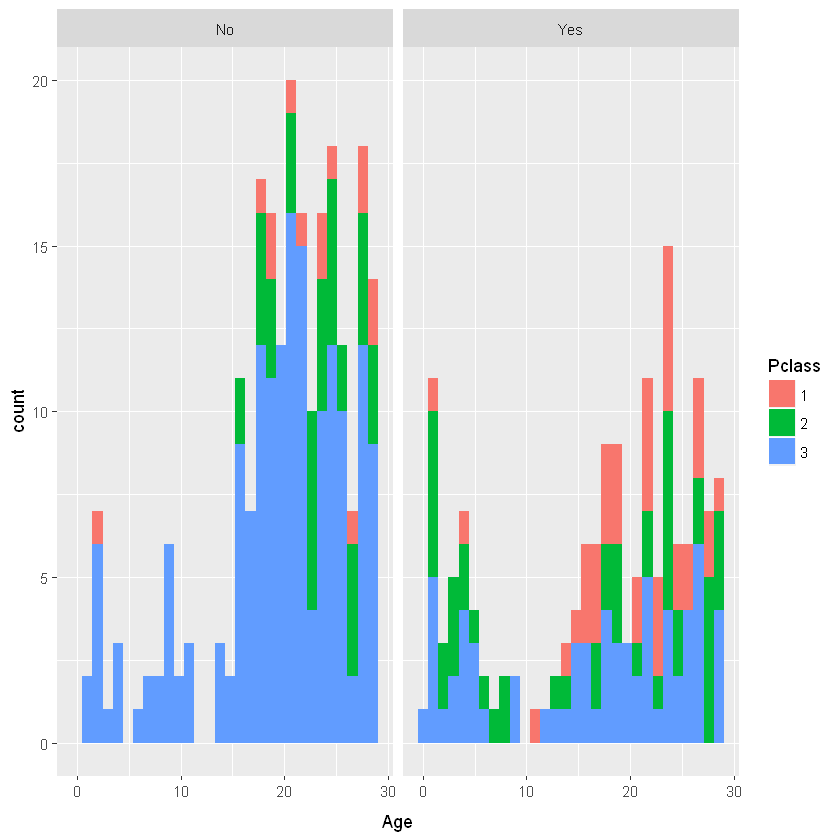

In [8]:
library(dplyr)
qplot(Age, data=filter(train,Age<30), geom="histogram", facets = . ~ Survived, fill=Pclass)

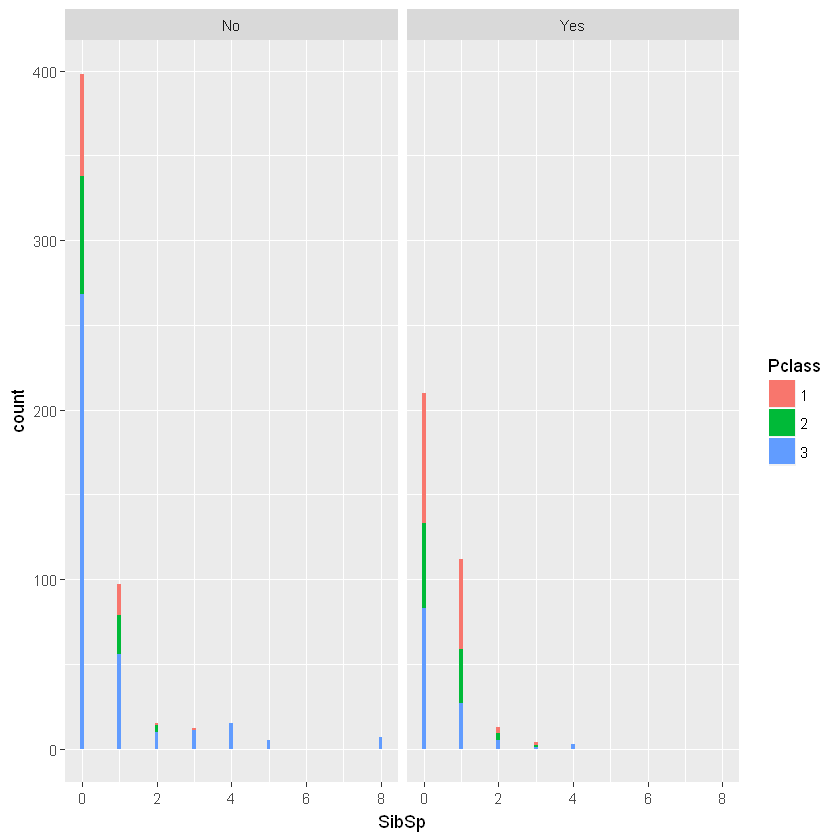

In [9]:
ggplot(train, aes(SibSp, fill = Pclass),) +geom_histogram(binwidth = 0.1)+facet_grid(. ~ Survived)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


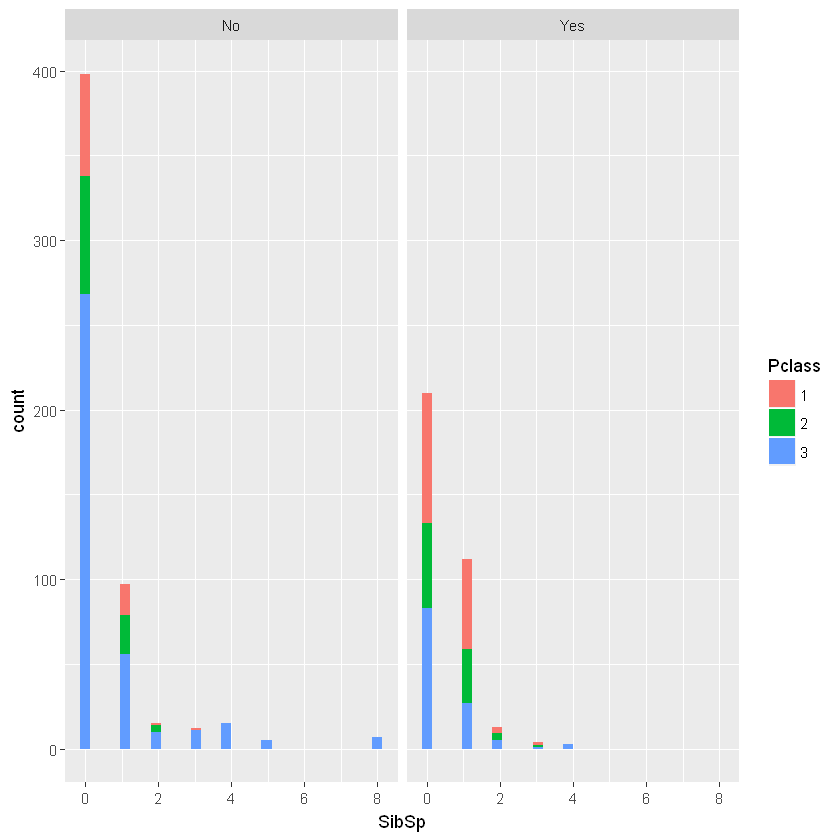

In [10]:
qplot(SibSp, data=filter(train,SibSp<9), geom="histogram", facets = . ~ Survived, fill=Pclass)

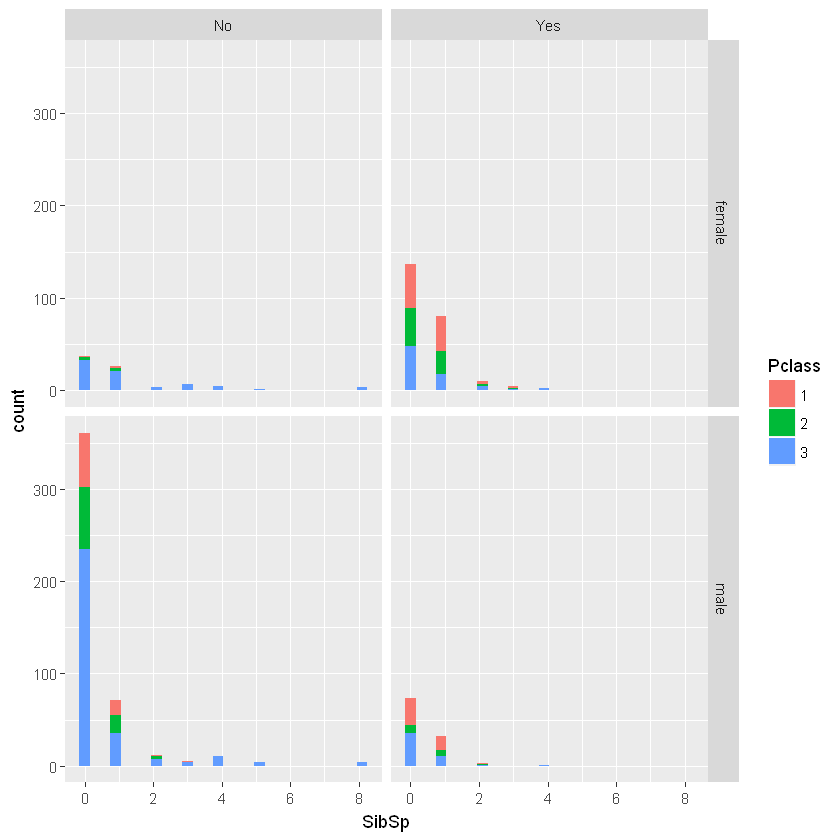

In [20]:
ggplot(train, aes(SibSp, fill = Pclass),) +geom_histogram(binwidth = 0.3)+facet_grid(Sex ~ Survived)

randomForest consist of machine learning algorithms. For this first we will fit the data into two variables, train the model and aplly it on test data.

In [12]:
library("randomForest")
fit <- randomForest(Survived ~Pclass + Sex, data=train)
prediction.1 <- predict(fit, test)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [14]:
predlist=data.frame(test, Survival_Prediction=prediction.1)
head(predlist)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival_Prediction
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,No
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,No
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,No
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,No
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,No
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,No


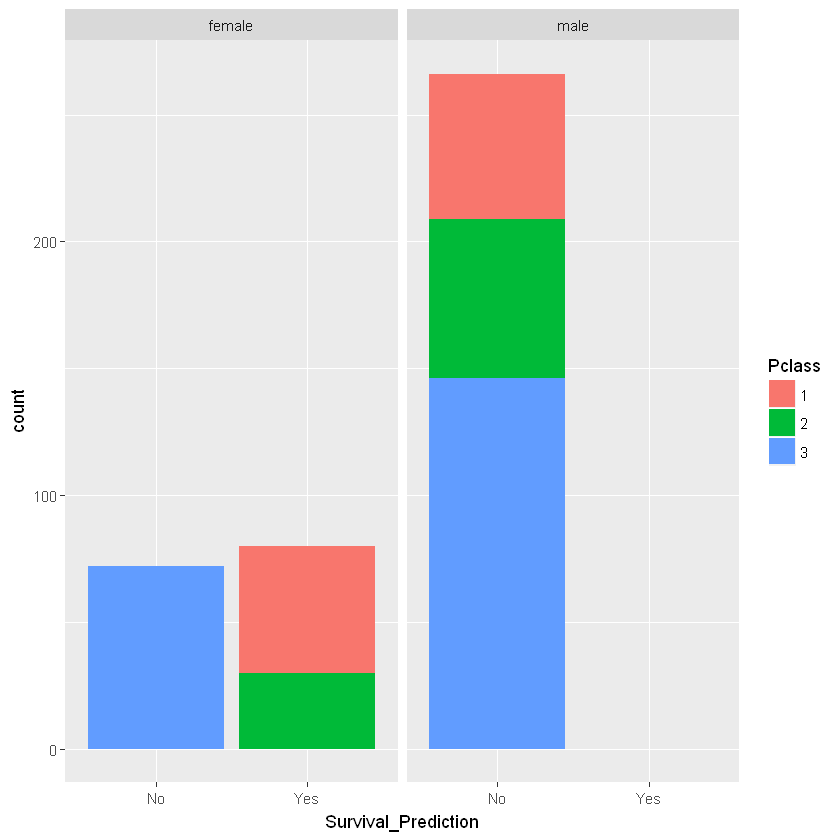

In [15]:
qplot(Survival_Prediction, data=predlist, geom="bar", facets = . ~ Sex, fill=Pclass)

In [17]:
fit <- randomForest(Survived ~Pclass + Sex + SibSp + Parch, data=train)
prediction.2 <- predict(fit, test)
predictlist2=data.frame(test, Survival_Prediction=prediction.2)
head(predictlist2)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival_Prediction
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,No
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,Yes
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,No
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,No
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,Yes
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,No


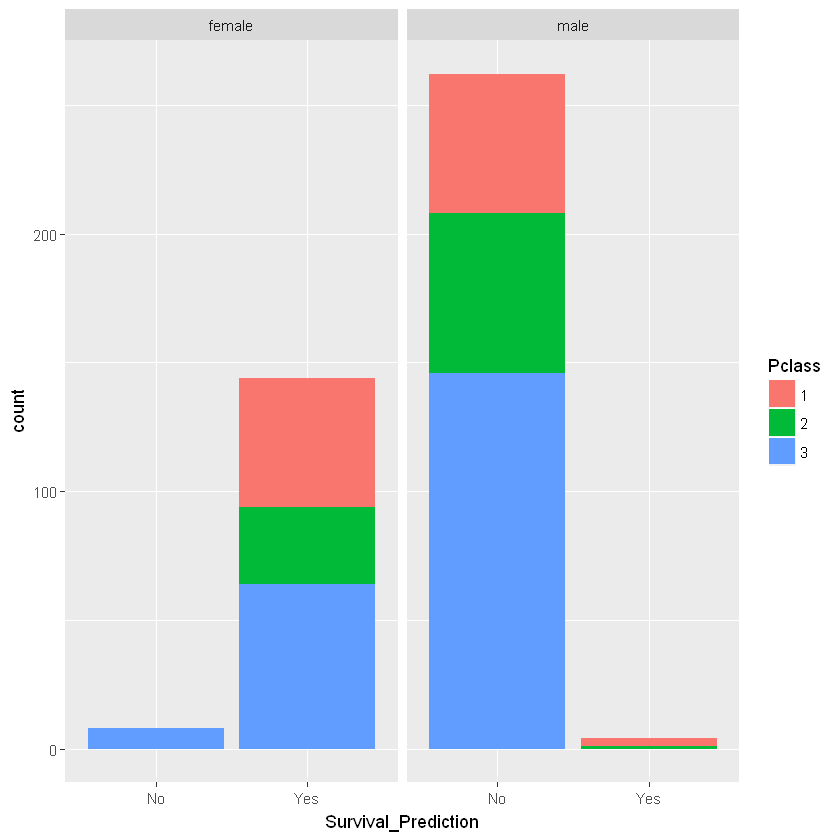

In [19]:
qplot(Survival_Prediction, data=predictlist2, geom="bar", facets = . ~ Sex, fill=Pclass)